In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
iris = sns.load_dataset('iris')
flowers = pd.DataFrame(iris)
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* What does the distribution of petal lengths look like?
* Is there a correlation between petal length and petal width?
* Would it be reasonable to predict species based on sepal width and sepal length?
* Which features would be best used to predict species?

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


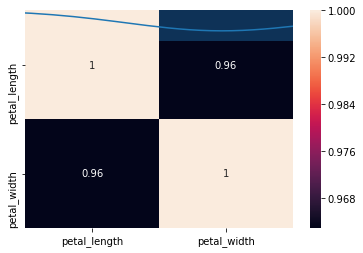

In [5]:
iris.head()
sns.distplot(iris.petal_length)

petal_corr = iris[['petal_length', 'petal_width']].corr()

sns.heatmap(petal_corr, annot=True)

In [4]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(iris.drop(columns='species_name')):
    plot_no = i + 1
    plt.subplot(2, 2, plot_no)
    sns.distplot(iris[col])
    plt.title('Distribution of ' + col)

KeyError: "['species_name'] not found in axis"

<Figure size 1008x720 with 0 Axes>

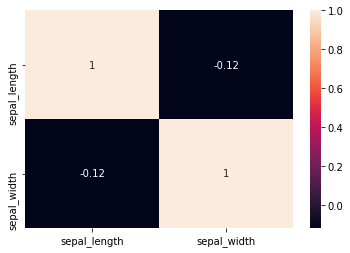

In [6]:
sept_corr = iris[['sepal_length', 'sepal_width']].corr()
sns.heatmap(sept_corr, annot=True)

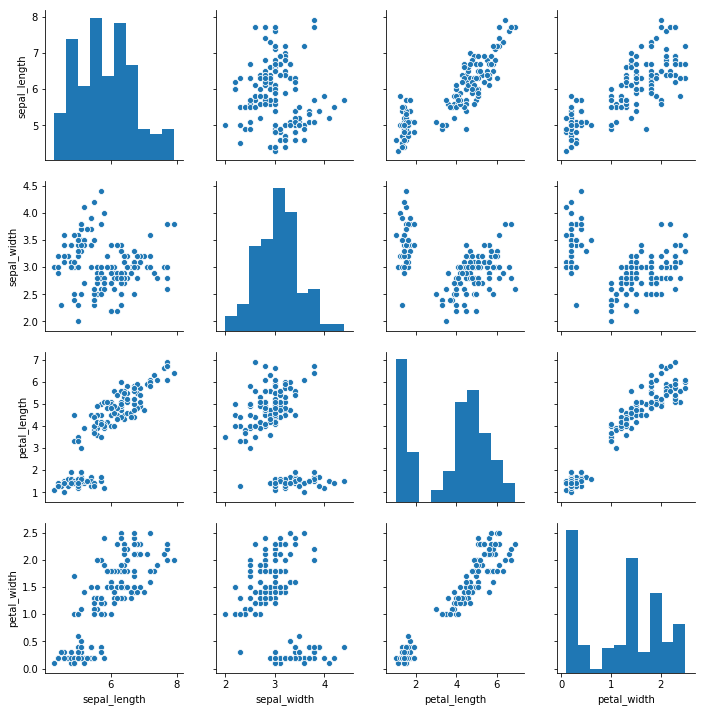

In [7]:
sns.pairplot(iris)

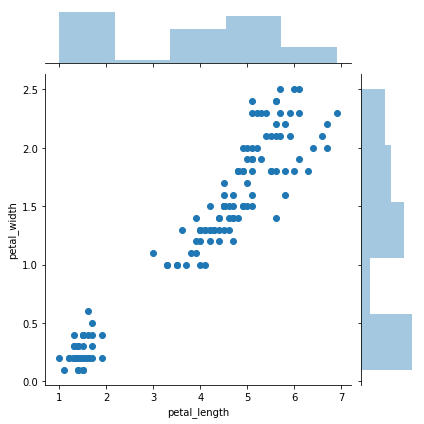

In [12]:
sns.jointplot(data=iris, x='petal_length', y='petal_width')

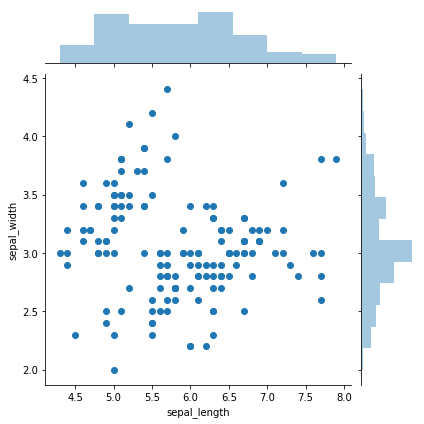

In [13]:
sns.jointplot(data=iris, x='sepal_length', y='sepal_width')

In [14]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
24,4.8,3.4,1.9,0.2,setosa
135,7.7,3.0,6.1,2.3,virginica
145,6.7,3.0,5.2,2.3,virginica
90,5.5,2.6,4.4,1.2,versicolor
139,6.9,3.1,5.4,2.1,virginica
55,5.7,2.8,4.5,1.3,versicolor
52,6.9,3.1,4.9,1.5,versicolor
137,6.4,3.1,5.5,1.8,virginica
8,4.4,2.9,1.4,0.2,setosa


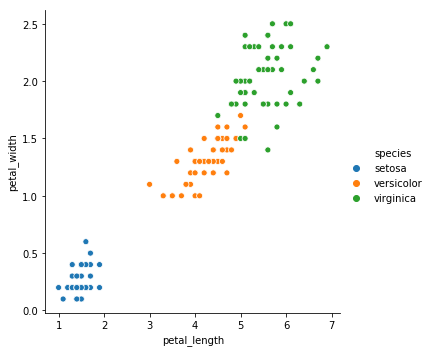

In [43]:
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='species')

In [27]:
p_length = flowers['petal_length'].mean()
p_width = flowers['petal_width'].mean()

In [35]:
flower_mean = flowers.groupby('species').mean()

In [36]:
flower_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [57]:
ans = sns.load_dataset('anscombe')
ansc = pd.DataFrame(ans)


Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [51]:
ans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,44.0,9.000000,3.198837,4.0,7.0000,8.00,11.0000,19.00
y,44.0,7.500682,1.958925,3.1,6.1175,7.52,8.7475,12.74


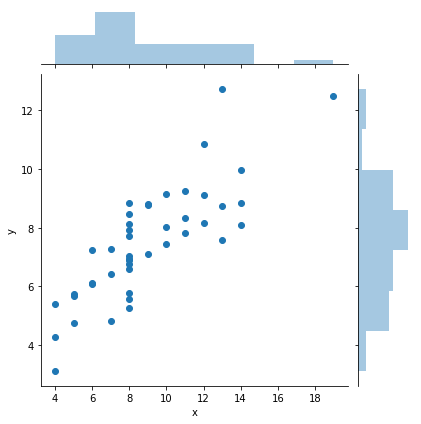

In [62]:
sns.jointplot(x=ansc.x, y=ansc.y)

In [72]:
from pydataset import data

sprays = data('InsectSprays')

In [75]:
sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


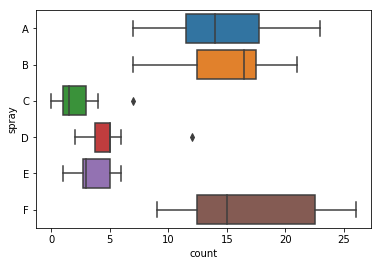

In [82]:
sns.boxplot(data=sprays, y='spray', x='count')

In [8]:
swiss = data('swiss')

In [85]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [9]:
swiss_df = pd.DataFrame(swiss)

In [88]:
swiss_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


* Create a column named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
* Does whether or not a province is Catholic influence fertility?
* What measure correlates most strongly with fertility?

In [94]:
is_catholic = swiss_df.Catholic > swiss_df.Catholic.mean()
swiss_df['is_catholic'] = is_catholic

In [95]:
swiss_df

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


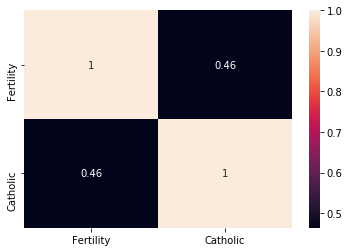

In [100]:
fertility = swiss_df[['Fertility', 'Catholic']].corr()
sns.heatmap(fertility, annot=True)

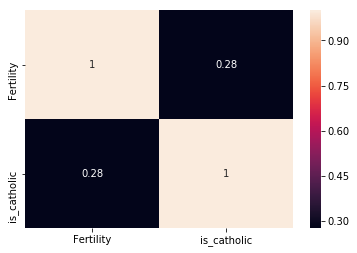

In [101]:
fertility2 = swiss_df[['Fertility', 'is_catholic']].corr()
sns.heatmap(fertility2, annot=True)

In [102]:
swiss_df.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.275720
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.311188
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.479546
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,0.038304
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.953898
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.135285
is_catholic,0.275720,0.311188,-0.479546,0.038304,0.953898,0.135285,1.000000


Feature correlations with fertility
Education          -0.663789
Examination        -0.645883
Agriculture         0.353079
Infant.Mortality    0.416556
Catholic            0.463685
Fertility           1.000000
Name: Fertility, dtype: float64


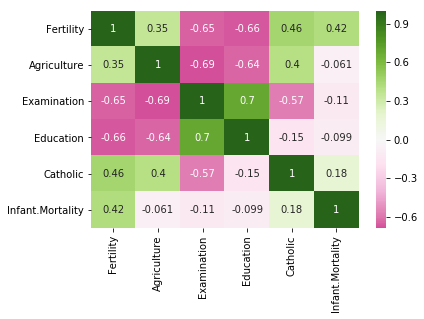

In [12]:
print('Feature correlations with fertility')
print(swiss.corr().Fertility.sort_values())

sns.heatmap(swiss.corr(), annot=True, center=0, cmap=cm.PiYG)

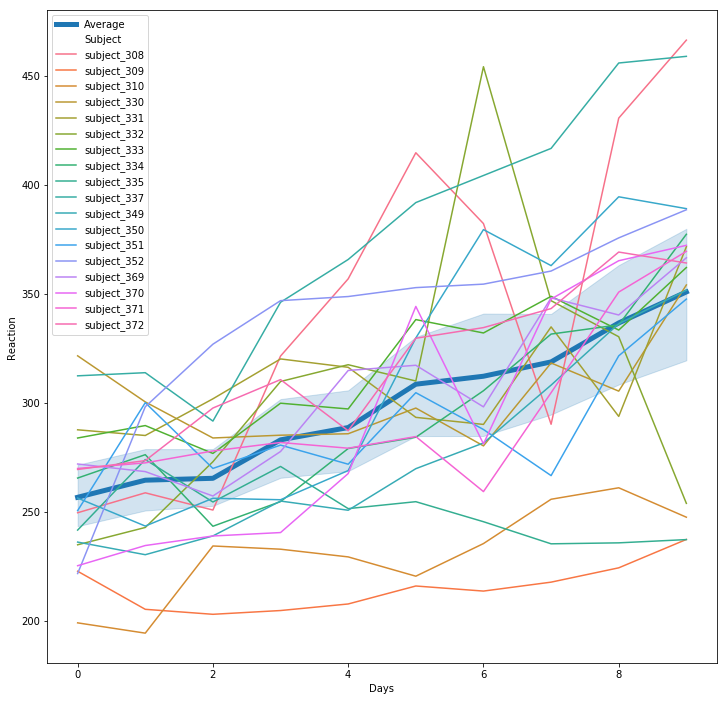

In [10]:
plt.figure(figsize=(12, 12))

sleep = data('sleepstudy')

sleep.Subject = 'subject_' + sleep.Subject.astype('str')

sns.lineplot(data=sleep, y='Reaction', x='Days', linewidth=5, label='Average')
sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject')